# Create a Gantt Chart
This small notebook shows how to use the Rantt class for creating a Gantt Chart. 

In [2]:
# These two lines are necessary if Rantt is not installed
# i.e. for navigating to the rantt.py file
import sys
sys.path.append("../")

import rantt
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
# Load the csv File
inp = rantt.Gantt_chart('../activities.csv')

In [4]:
# Present the table form or the Gantt Chart
inp.showCSV()

,workstream,activity,start date,end date,milestone,deliverable,dependency
0,WP1,Draft Proposal,2019-01-15,2019-03-01,2019-03-01,NaN,NaN
1,WP1,Proofread,2019-02-15,2019-02-22,NaN,NaN,Draft Proposal
2,WP2,Design data model,2019-03-01,2019-03-15,2019-03-15,2019-03-15,NaN
3,WP2,Set up data base,2019-03-15,2019-05-01,NaN,NaN,Design data model
4,WP2,Implement data model,2019-04-01,2019-05-01,2019-05-01,NaN,Set up data base


In [5]:
#inp.addDependencies()

Int64Index([1, 3, 4], dtype='int64')
Int64Index([0, 2, 3], dtype='int64')
[5 3 2] [6 4 3]
0
1
5 6
0
3
3 4
0
4
2 3


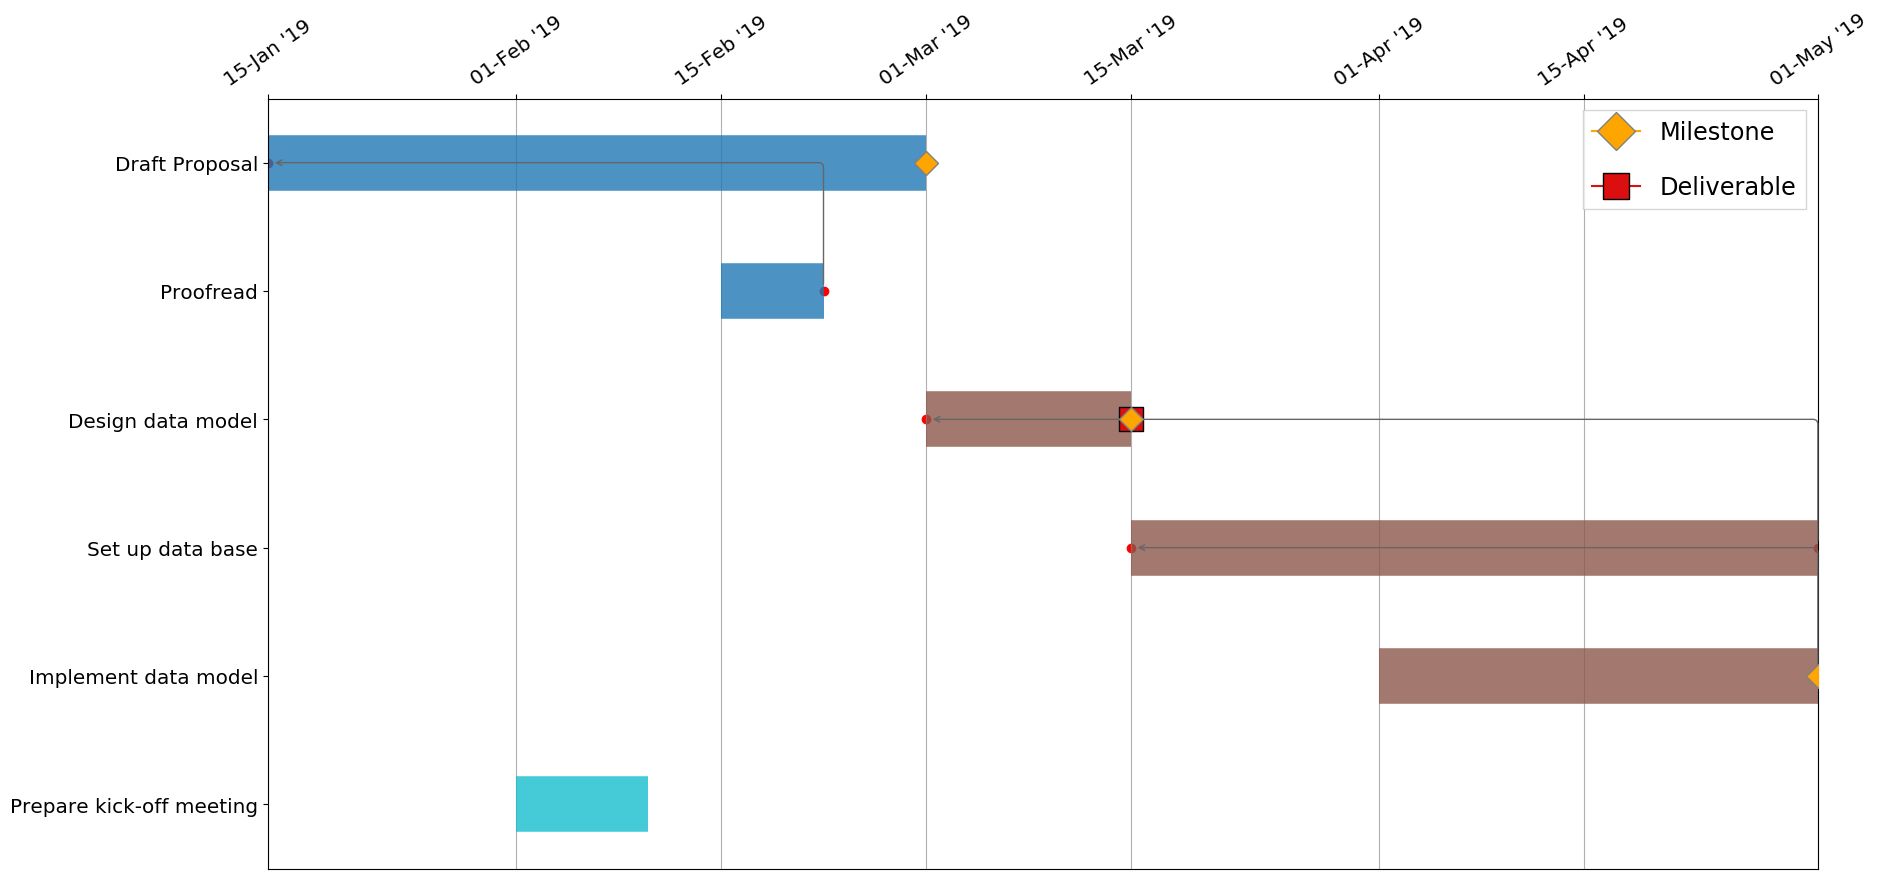

In [6]:
%matplotlib inline
# Plot the Gantt Chart
inp.preparePlot()
#inp.save('../imgs/gantt_chart.png')

------------------------------------------------

## Analogue dependency programming

In [7]:
import pandas as pd
dd = pd.read_csv('../activities.csv')
dd

,Workstream,Activity,Start Date,End Date,Milestone,Deliverable,Dependency
0,WP1,Draft Proposal,2019-01-15,2019-03-01,2019-03-01,NaN,NaN
1,WP1,Proofread,2019-02-15,2019-02-22,NaN,NaN,Draft Proposal
2,WP2,Design data model,2019-03-01,2019-03-15,2019-03-15,2019-03-15,NaN
3,WP2,Set up data base,2019-03-15,2019-05-01,NaN,NaN,Design data model
4,WP2,Implement data model,2019-04-01,2019-05-01,2019-05-01,NaN,Set up data base
5,WP3,Prepare kick-off meeting,2019-02-01,2019-02-10,NaN,NaN,NaN


In [8]:
dep = dd.Dependency.notnull()

In [9]:
xtails = dd.Dependency[dep]

In [10]:
ytails = np.linspace(1,5,len(xtails))

In [11]:
test = [dd.Activity.loc[dd.Activity == i] for i in xtails.values]

In [12]:
idx = np.array([test[i].index.values[0] for i in range(len(test))])

In [13]:
xhead = dd.Activity[idx]
yhead = np.linspace(0,4,len(xtails))

In [14]:
dd.Activity.loc[dep]

1               Proofread
3        Set up data base
4    Implement data model
Name: Activity, dtype: object

In [15]:
dd.query("Dependency in Activity")

,Workstream,Activity,Start Date,End Date,Milestone,Deliverable,Dependency
1,WP1,Proofread,2019-02-15,2019-02-22,NaN,NaN,Draft Proposal
3,WP2,Set up data base,2019-03-15,2019-05-01,NaN,NaN,Design data model
4,WP2,Implement data model,2019-04-01,2019-05-01,2019-05-01,NaN,Set up data base


In [16]:
print(dd['End Date'][xtails.index])
print(dd['Start Date'][xhead.index])

1    2019-02-22
3    2019-05-01
4    2019-05-01
Name: End Date, dtype: object
0    2019-01-15
2    2019-03-01
3    2019-03-15
Name: Start Date, dtype: object


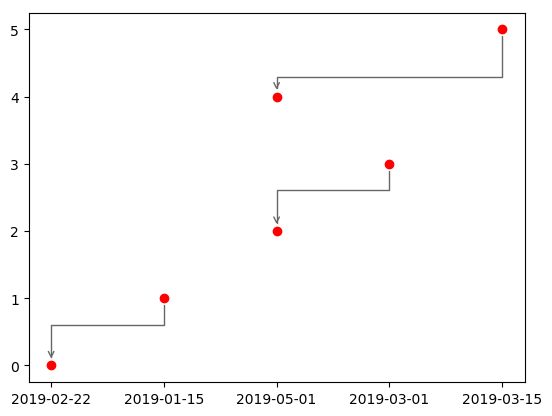

In [17]:
# plot arrows
csstyle="bar,angle=180,fraction=-0.2"
#plt.plot([dd['Start Date'][xhead.index], dd['End Date'][xtails.index]],
#        [yhead, ytails])
for i,j in enumerate(xtails.index):
    
    plt.plot([dd['End Date'][j], dd['Start Date'][j-1]],
            [yhead[i], ytails[i]], "ro")
    
    plt.annotate("", xy=(dd['End Date'][j], yhead[i]), xycoords='data',
                xytext=(dd['Start Date'][j-1], ytails[i]), textcoords='data',
                arrowprops=dict(arrowstyle="->", color="0.4",
                                    shrinkA=5, shrinkB=5, patchA=None,
                                    patchB=None, connectionstyle=csstyle))

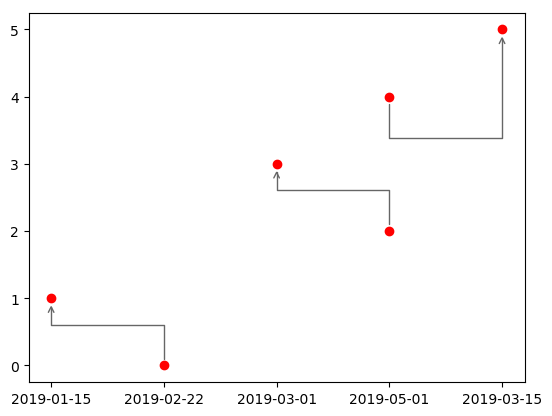

In [18]:
# plot arrows 2
csstyle="bar,angle=180,fraction=-0.2"
#plt.plot([dd['Start Date'][xhead.index], dd['End Date'][xtails.index]],
#        [yhead, ytails])
for i,j in enumerate(xtails.index):
    
    plt.plot([dd['Start Date'][j-1], dd['End Date'][j]],
            [ytails[i], yhead[i]], "ro")
    
    plt.annotate("", xy=(dd['Start Date'][j-1], ytails[i]), xycoords='data',
                xytext=(dd['End Date'][j], yhead[i]), textcoords='data',
                arrowprops=dict(arrowstyle="->", color="0.4",
                                    shrinkA=5, shrinkB=5, patchA=None,
                                    patchB=None, connectionstyle=csstyle))

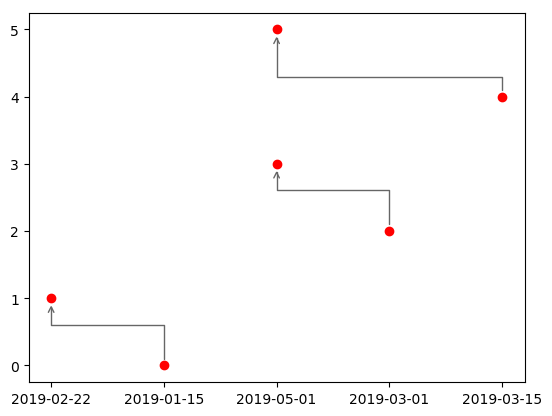

In [19]:
# plot arrows 2
csstyle="bar,angle=180,fraction=-0.2"
#plt.plot([dd['Start Date'][xhead.index], dd['End Date'][xtails.index]],
#        [yhead, ytails])
for i in range(len(xtails.index)):
    
    plt.plot([dd['End Date'][xtails.index[i]], dd['Start Date'][xhead.index[i]]],
            [ytails[i], yhead[i]], "ro")
    
    plt.annotate("", xy=(dd['End Date'][xtails.index[i]], ytails[i]), xycoords='data',
                xytext=(dd['Start Date'][xhead.index[i]], yhead[i]), textcoords='data',
                arrowprops=dict(arrowstyle="->", color="0.4",
                                    shrinkA=5, shrinkB=5, patchA=None,
                                    patchB=None, connectionstyle=csstyle))

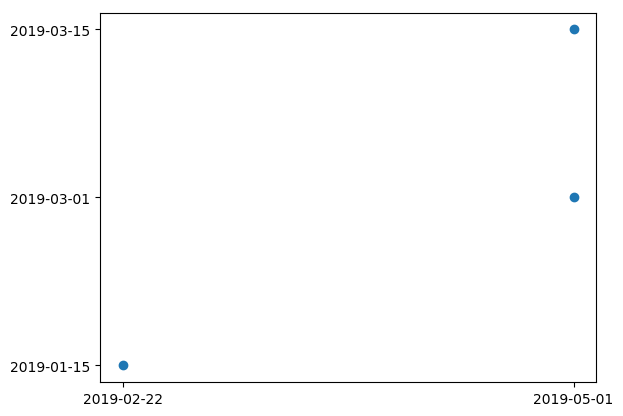

In [25]:
plt.plot(dd['End Date'][xtails.index], dd['Start Date'][xhead.index], 'o')

In [27]:
print(dd['End Date'][xhead.index])
print(dd['Start Date'][xtails.index])

0    2019-03-01
2    2019-03-15
3    2019-05-01
Name: End Date, dtype: object
1    2019-02-15
3    2019-03-15
4    2019-04-01
Name: Start Date, dtype: object
